# 读写文本格式的数据

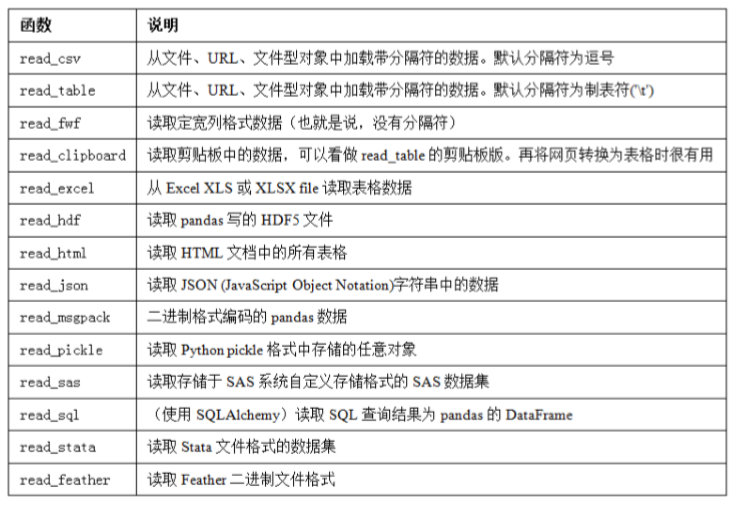

In [1]:
!type ../examples/ex1.csv

命令语法不正确。


In [2]:
import pandas as pd

In [3]:
# 该文件以逗号分隔，所以我们可以使用 read_csv 将其读入一个 
df = pd.read_csv('../examples/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [4]:
print(df)

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo


In [5]:
# 使用 read_table，并指定分隔符： (默认分隔符为制表符\t)
pd.read_table('../examples/ex1.csv', sep=',')   # 无标题行

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [6]:
pd.read_csv("../examples/ex2.csv")    # 此文件无标题行

,1,2,3,4,hello
0,5,6,7,8,world
1,9,10,11,12,foo


让 pandas 为其分配默认的列名，也可以自己 定义列名

In [7]:
pd.read_csv("../examples/ex2.csv", header=None)   # 分配默认的列名

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [8]:
pd.read_csv("../examples/ex2.csv", names=['a', 'b', 'c', 'd', 'message'])   # 

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


望将 message 列做成 DataFrame 的索引。你可以明确表示要将该列放 到索引 4 的位置上，也可以通过 index_col 参数指定"message"： 

In [9]:
names=['a', 'b', 'c', 'd', 'message']
pd.read_csv('../examples/ex2.csv', names=names, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [10]:
pd.read_csv('../examples/ex2.csv', names=names, index_col='d')  # 把d列 作为索引

,a,b,c,message
d,,,,
4,1,2,3,hello
8,5,6,7,world
12,9,10,11,foo


将多个列做成一个层次化索引，只需传入由列编号或列名组成的列表 即可

In [11]:
parsed = pd.read_csv('../examples/csv_mindex.csv')
parsed

,key1,key2,value1,value2
0,one,a,1,2
1,one,b,3,4
2,one,c,5,6
3,one,d,7,8
4,two,a,9,10
5,two,b,11,12
6,two,c,13,14
7,two,d,15,16


In [12]:
parsed = pd.read_csv('../examples/csv_mindex.csv', index_col=['key1', 'key2'])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

有些表格可能不是用固定的分隔符去分隔字段的（比如空白符或 其他模式来分隔字段）。

In [13]:
list(open('../examples/ex3.txt'))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

这种情况下，你可以传递一个正则表达式作为 read_table 的分隔符。可以 用正则表达式表达为\s+

这里，由于列名比数据行的数量少，所以 read_table 推断第一列应该是 DataFrame 的索引。这里，由于列名比数据行的数量少，所以 read_table 推断 第一列应该是 DataFrame 的索引

In [14]:
result = pd.read_table('../examples/ex3.txt', sep='\s+')
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


用 skiprows 跳过文件的第一行、第三行和第 四行

In [15]:
pd.read_csv('../examples/ex4.csv')

,,,,# hey!
a,b,c,d,message
# just wanted to make things more difficult for you,NaN,NaN,NaN,NaN
# who reads CSV files with computers,anyway?,NaN,NaN,NaN
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [16]:
pd.read_csv('../examples/ex4.csv', skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


缺失值处理是文件解析任务中的一个重要组成部分。缺失数据经常是要么没有 （空字符串），要么用某个标记值表示。默认情况下，pandas 会用一组经常出 现的标记值进行识别，比如 NA 及 NULL

In [17]:
result = pd.read_csv('../examples/ex5.csv') 
result 

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [18]:
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


na_values 可以用一个列表或集合的字符串表示缺失值： 

In [19]:
result = pd.read_csv('../examples/ex5.csv', na_values=['NULL'])
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


字典的各列可以使用不同的 NA 标记值

In [20]:
sentinels = {'message':['foo', 'NA'], 'something':['two']}
pd.read_csv('../examples/ex5.csv', na_values=sentinels)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


 pandas.read_csv 和 pandas.read_table 常用的选项。 
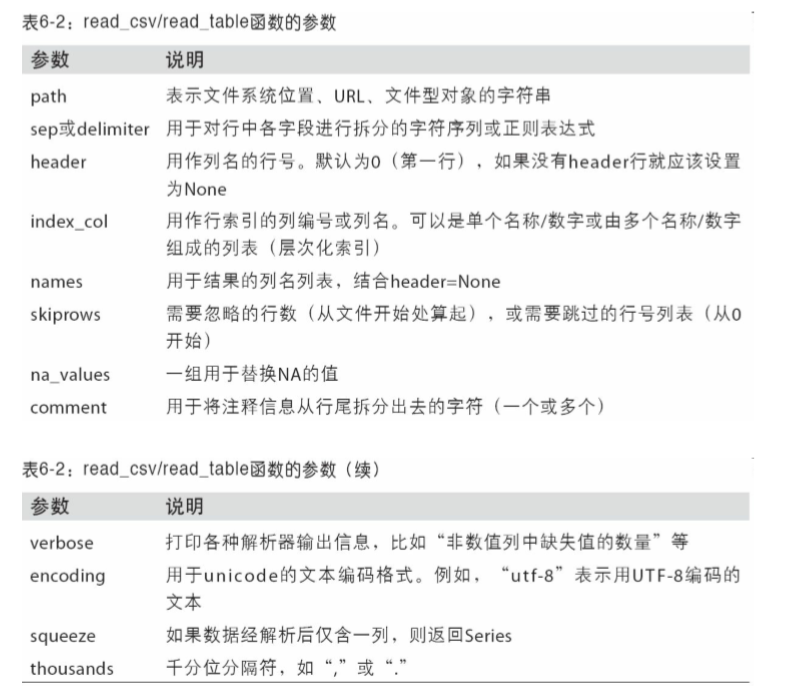

# 逐块读取文本文件 

在处理很大的文件时，或找出大文件中的参数集以便于后续处理时，你可能只 想读取文件的一小部分或逐块对文件进行迭代

In [21]:
pd.options.display.max_rows = 10

In [22]:
result = pd.read_csv('../examples/ex6.csv')

In [23]:
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


如果只想读取几行（避免读取整个文件），通过 nrows 进行指定即可

In [24]:
pd.read_csv('../examples/ex6.csv', nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


要逐块读取文件，可以指定 chunksize（行数）： 
read_csv 所返回的这个 TextParser 对象使你可以根据 chunksize 对文件进行 逐块迭代。比如说，我们可以迭代处理 ex6.csv，将值计数聚合到"key"列中， 如下所示

In [25]:
chunker = pd.read_csv('../examples/ex6.csv', chunksize=1000) 
tot = pd.Series([])

In [26]:
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0)
tot = tot.sort_values(ascending=False)

In [27]:
tot[:10]

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64

# 将数据写出到文本格式

利用 DataFrame 的 to_csv 方法，我们可以将数据写到一个以逗号分隔的文件 中： 

In [28]:
data = pd.read_csv('../examples/ex5.csv')

In [29]:
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [30]:
data.to_csv('exercise/out.csv')

当然，还可以使用其他分隔符（由于这里直接写出到 sys.stdout，所以仅仅是 打印出文本结果而已）： 

In [31]:
import sys

In [32]:
data.to_csv(sys.stdout, sep='|')  # 没有写入，只是打印

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


缺失值在输出结果中会被表示为空字符串。你可能希望将其表示为别的标记 值

In [33]:
data.to_csv(sys.stdout, na_rep='NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


还可以只写出一部分的列，并以你指定的顺序排列： 

In [34]:
data.to_csv(sys.stdout, index=False, columns=['a', 'b', 'c'])

a,b,c
1,2,3.0
5,6,
9,10,11.0


Series 也有一个 to_csv 方法

In [35]:
import numpy as np
dates = pd.date_range('1/1/2000', periods=7)
ts = pd.Series(np.arange(7), index=dates)
ts.to_csv('exercise/tseries.csv')

# 处理分隔符格式

对于任何单字符分隔符文件，可以直接使用 Python 内置的 csv 模块。将任意已 打开的文件或文件型的对象传给 csv.reader

In [36]:
import csv

In [37]:
f = open('../examples/ex7.csv')
reader = csv.reader(f)

对 这个 reader 进行迭代将会为每行产生一个元组（并移除了所有的引号）： 

In [38]:
for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


现在，为了使数据格式合乎要求，你需要对其做一些整理工作。我们一步一步 来做。首先，读取文件到一个多行的列表中： 

In [39]:
with open('../examples/ex7.csv') as f:
    lines = list(csv.reader(f)) 

In [40]:
print(lines)

[['a', 'b', 'c'], ['1', '2', '3'], ['1', '2', '3']]


我们将这些行分为标题行和数据行

In [41]:
header, values = lines[0], lines[1:]

然后，我们可以用字典构造式和 zip(*values)，后者将行转置为列，创建数据 列的字典： 

In [42]:
data_dict = {h: v for h, v in zip(header, zip(*values))} 
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

In [43]:
# zipped = zip(*values)
# zipped   ==>[('1', '1'), ('2', '2'), ('2', '2')]

CSV 文件的形式有很多。只需定义 csv.Dialect 的一个子类即可定义出新格式 （如专门的分隔符、字符串引用约定、行结束符等）： 

In [44]:
class my_dialect(csv.Dialect):
    lineterminator = '\n'     
    delimiter = ';'     
    quotechar = '"'     
    quoting = csv.QUOTE_MINIMAL 

In [45]:
reader = csv.reader(reader, dialect=my_dialect) 

In [46]:
reader = csv.reader(reader, delimiter='|') 

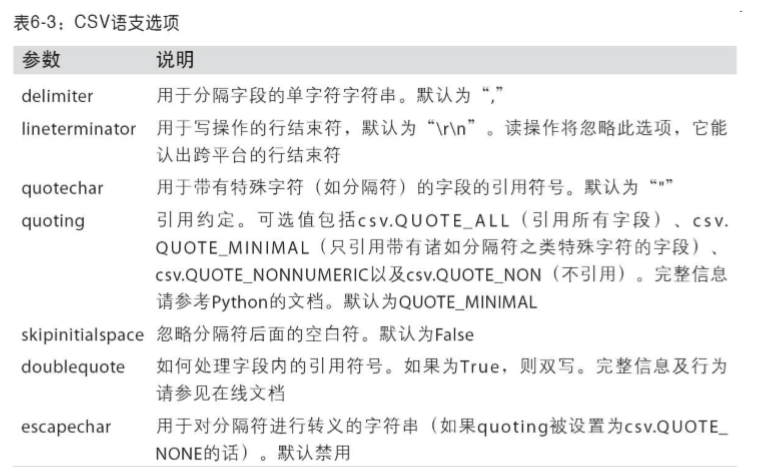

笔记：对于那些使用复杂分隔符或多字符分隔符的文件，csv 模块就无能为力 了。这种情况下，你就只能使用字符串的 split 方法或正则表达式方法 re.split 进行行拆分和其他整理工作了。 

要手工输出分隔符文件，你可以使用 csv.writer。它接受一个已打开且可写的 文件对象以及跟 csv.reader 相同的那些语支和格式化选项： 

In [47]:
with open('exercise/mydata.csv', 'w') as f:
    writer = csv.writer(f, dialect=my_dialect)   # 以逗号分割
    writer.writerow(('one', 'two', 'three'))
    writer.writerow(('1', '2', '3'))
    writer.writerow(('4', '5', '6'))
    writer.writerow(('7', '8', '9'))

In [48]:
with open('exercise/mydata1.csv', 'w') as f:
    writer = csv.writer(f, delimiter='|')
    writer.writerow(('one', 'two', 'three'))
    writer.writerow(('1', '2', '3'))
    writer.writerow(('4', '5', '6'))
    writer.writerow(('7', '8', '9'))

# JSON 数据

JSON（JavaScript Object Notation 的简称）已经成为通过 HTTP 请求在 Web 浏览器和其他应用程序之间发送数据的标准格式之一。它是一种比表格型文本 格式（如 CSV）灵活得多的数据格式。下面是一个例子： 

In [49]:
obj = """ 
{"name": "Wes",  
"places_lived": ["United States", "Spain", "Germany"],  
"pet": null,  
"siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},               
             {"name": "Katie", "age": 38,                
             "pets": ["Sixes", "Stache", "Cisco"]}] 
} """ 

通过 json.loads 即可将 JSON 字符串转换成 Python 形 式

In [50]:
import json

In [51]:
result = json.loads(obj)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

json.dumps 则将 Python 对象转换成 JSON 格式： 

In [52]:
asjson = json.dumps(result)

In [53]:
asjson 

'{"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]}'

如何将（一个或一组）JSON 对象转换为 DataFrame 或其他便于分析的数据结构 就由你决定了。简单方便的方式是：向 DataFrame 构造器传入一个字典的列 表（就是原先的 JSON 对象），并选取数据字段的子集

In [54]:
siblings = pd.DataFrame(result['siblings'], columns=['name', 'age'])
siblings

,name,age
0,Scott,30
1,Katie,38


In [55]:
siblings = pd.DataFrame(result['siblings'], columns=['name', 'age', 'pets'])
siblings

,name,age,pets
0,Scott,30,"[Zeus, Zuko]"
1,Katie,38,"[Sixes, Stache, Cisco]"


In [56]:
siblings = pd.DataFrame(result, columns=['name', 'places_lived', 'pet'])
siblings

,name,places_lived,pet
0,Wes,United States,NaN
1,Wes,Spain,NaN
2,Wes,Germany,NaN


pandas.read_json 的默认选项假设 JSON 数组中的每个对象是表格中的一行： 

In [57]:
data = pd.read_json('../examples/example.json')

In [58]:
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


如果你需要将数据从 pandas 输出到 JSON，可以使用 to_json 方法

In [59]:
print(data.to_json())

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}


In [60]:
print(data.to_json(orient='records'))

[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


# XML 和 HTML：Web 信息收集 

Python 有许多可以读写常见的 HTML 和 XML 格式数据的库，包括 lxml、 Beautiful Soup 和 html5lib。lxml 的速度比较快，但其它的库处理有误的 HTML 或 XML 文件更好。 

In [61]:
import lxml

pandas.read_html 有一些选项，默认条件下，它会搜索、尝试解析<table>标
签内的的表格数据。结果是一个列表的 DataFrame 对象

In [62]:
tables = pd.read_html('../examples/fdic_failed_bank_list.html')

In [63]:
len(tables)

1

In [64]:
failures = tables[0]

In [65]:
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


这里，我们可以做一些数据清洗和分析（后面章节会进一步讲解），比如计算
按年份计算倒闭的银行数

In [66]:
close_timestamps = pd.to_datetime(failures['Closing Date'])

In [67]:
close_timestamps.dt.year.value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
       ... 
2004      4
2001      4
2007      3
2003      3
2000      2
Name: Closing Date, Length: 15, dtype: int64

# 利用 lxml.objectify 解析 XML

XML（Extensible Markup Language）是另一种常见的支持分层、嵌套数据以及
元数据的结构化数据格式。本书所使用的这些文件实际上来自于一个很大的
XML 文档。

In [68]:
from lxml import objectify

我们先用 lxml.objectify 解析该文件，然后通过 getroot 得到该 XML 文件的根
节点的引用

In [69]:
path = '../datasets/mta_perf/Performance_MNR.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()

root.INDICATOR 返回一个用于产生各个<INDICATOR>XML 元素的生成器。对于每
条记录，我们可以用标记名（如 YTD_ACTUAL）和数据值填充一个字典（排除几
个标记）

In [70]:
data = []

In [71]:
skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ', 'DESIRED_CHANGE', 'DECIMAL_PLACES']

In [72]:
for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        if child.tag in skip_fields:   # 排除几个标记
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)
    

In [73]:
perf = pd.DataFrame(data)
perf.head()

,AGENCY_NAME,CATEGORY,DESCRIPTION,FREQUENCY,INDICATOR_NAME,INDICATOR_UNIT,MONTHLY_ACTUAL,MONTHLY_TARGET,PERIOD_MONTH,PERIOD_YEAR,YTD_ACTUAL,YTD_TARGET
0,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,96.9,95,1,2008,96.9,95
1,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,95,95,2,2008,96,95
2,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,96.9,95,3,2008,96.3,95
3,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,98.3,95,4,2008,96.8,95
4,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,95.8,95,5,2008,96.6,95


XML 数据可以比本例复杂得多。每个标记都可以有元数据。看看下面这个 HTML
的链接标签（它也算是一段有效的 XML）：

In [74]:
from io import StringIO
tag = '<a href="http://www.google.com">Google</a>'
root = objectify.parse(StringIO(tag)).getroot()

In [75]:
root

<Element a at 0x296072cf088>

In [76]:
root.get('href')

'http://www.google.com'

In [77]:
root.text

'Google'

# 二进制数据格式

实现数据的高效二进制格式存储最简单的办法之一是使用 Python 内置的
pickle 序列化。pandas 对象都有一个用于将数据以 pickle 格式保存到磁盘上
的 to_pickle 方法：

In [78]:
frame = pd.read_csv('../examples/ex1.csv')
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [79]:
frame.to_pickle('exercise/frame_pickle')

你可以通过 pickle 直接读取被 pickle 化的数据，或是使用更为方便的
pandas.read_pickle

In [80]:
pd.read_pickle('exercise/frame_pickle')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


注意：pickle 仅建议用于短期存储格式。其原因是很难保证该格式永远是稳定
的；今天 pickle 的对象可能无法被后续版本的库 unpickle 出来。虽然我尽力
保证这种事情不会发生在 pandas 中，但是今后的某个时候说不定还是得“打
破”该 pickle 格式。

## 使用 HDF5 格式

HDF5 是一种存储大规模科学数组数据的非常好的文件格式。它可以被作为 C
库，带有许多语言的接口，如 Java、Python 和 MATLAB 等。HDF5 中的 HDF 指的
是层次型数据格式（hierarchical data format）。每个 HDF5 文件都含有一个
文件系统式的节点结构，它使你能够存储多个数据集并支持元数据。与其他简
单格式相比，HDF5 支持多种压缩器的即时压缩，还能更高效地存储重复模式数
据。对于那些非常大的无法直接放入内存的数据集，HDF5 就是不错的选择，因
为它可以高效地分块读写。

虽然可以用 PyTables 或 h5py 库直接访问 HDF5 文件，pandas 提供了更为高级
的接口，可以简化存储 Series 和 DataFrame 对象。HDFStore 类可以像字典一
样，处理低级的细节

In [81]:
frame = pd.DataFrame({'a': np.random.randn(100)})

In [82]:
store = pd.HDFStore('mydata.h5')

In [83]:
store['obj1'] = frame

In [84]:
store['obj1_col'] = frame['a']

In [85]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: mydata.h5

In [86]:
store['obj1']

,a
0,-0.902049
1,-0.335830
2,-0.513534
3,-0.326835
4,-2.923927
...,...
95,-0.669577
96,0.433685
97,-0.298096
98,0.969707


In [87]:
store['obj1_col']

0    -0.902049
1    -0.335830
2    -0.513534
3    -0.326835
4    -2.923927
        ...   
95   -0.669577
96    0.433685
97   -0.298096
98    0.969707
99    1.482949
Name: a, Length: 100, dtype: float64

HDFStore 支持两种存储模式，'fixed'和'table'。后者通常会更慢，但是支持
使用特殊语法进行查询操作

In [88]:
store.put('obj2', frame, format='table')

In [89]:
store.select('obj2', where=['index >= 10 and index <= 15'])

,a
10,-0.833525
11,2.745355
12,1.022951
13,-0.706763
14,-0.355494
15,-0.334046


In [90]:
store.close()

put 是 store['obj2'] = frame 方法的显示版本，允许我们设置其它的选项，
比如格式。

pandas.read_hdf 函数可以快捷使用这些工具

In [91]:
frame.to_hdf('mydata.h5', 'obj3', format='table')

In [92]:
pd.read_hdf('mydata.h5', 'obj3', where=['index < 5'])

,a
0,-0.902049
1,-0.335830
2,-0.513534
3,-0.326835
4,-2.923927


In [93]:
import os
os.remove('mydata.h5')

## Reading Microsoft Excel Files

In [94]:
xlsx = pd.ExcelFile('../examples/ex1.xlsx')

如果要读取一个文件中的多个表单，创建 ExcelFile 会更快，但你也可以将文
件名传递到 pandas.read_excel：

In [95]:
pd.read_excel(xlsx, 'Sheet1')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [96]:
frame = pd.read_excel('../examples/ex1.xlsx', 'Sheet1')
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


如果要将 pandas 数据写入为 Excel 格式，你必须首先创建一个 ExcelWriter，
然后使用 pandas 对象的 to_excel 方法将数据写入到其中：

In [97]:
writer = pd.ExcelWriter('exercise/ex2.xlsx')

In [98]:
frame.to_excel(writer, 'Sheet1')

In [99]:
writer.save()

你还可以不使用 ExcelWriter，而是传递文件的路径到 to_excel：

In [100]:
frame.to_excel('exercise/ex3.xlsx')

#  Web APIs 交互

In [101]:
import requests

In [102]:
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'

In [103]:
resp = requests.get(url)
resp

<Response [200]>

响应对象的 json 方法会返回一个包含被解析过的 JSON 字典，加载到一个
Python 对象中：

In [104]:
data = resp.json()

In [105]:
data[2]['title']

'BUG-26214 fix colors parameter in DataFrame.boxplot'

data 中的每个元素都是一个包含所有 GitHub 主题页数据（不包含评论）的字
典。我们可以直接传递数据到 DataFrame，并提取感兴趣的字段：

In [106]:
issues = pd.DataFrame(data, columns=['number', 'title', 'labels', 'state'])

In [107]:
issues

,number,title,labels,state
0,26458,Deprecate py.path support,"[{'id': 87485152, 'node_id': 'MDU6TGFiZWw4NzQ4...",open
1,26457,WIP: Add indent support in to_json,"[{'id': 49379259, 'node_id': 'MDU6TGFiZWw0OTM3...",open
2,26456,BUG-26214 fix colors parameter in DataFrame.bo...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
3,26455,BUG: Fix for pd.read_fwf not reading addinfour...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
4,26454,"GroupBy nth with Categorical, NA Data and dropna","[{'id': 78527356, 'node_id': 'MDU6TGFiZWw3ODUy...",open
...,...,...,...,...
25,26411,"Grouping, then resampling empty DataFrame lead...","[{'id': 233160, 'node_id': 'MDU6TGFiZWwyMzMxNj...",open
26,26410,"API: getting the ""densified"" values of a Categ...","[{'id': 35818298, 'node_id': 'MDU6TGFiZWwzNTgx...",open
27,26409,DEPR: deprecate get_values,"[{'id': 87485152, 'node_id': 'MDU6TGFiZWw4NzQ4...",open
28,26408,BUG: MultiIndex not dropping nan level and inv...,"[{'id': 2822342, 'node_id': 'MDU6TGFiZWwyODIyM...",open


# 数据库交互

在商业场景下，大多数数据可能不是存储在文本或 Excel 文件中。基于 SQL 的
关系型数据库（如 SQL Server、PostgreSQL 和 MySQL 等）使用非常广泛，其它
一些数据库也很流行。数据库的选择通常取决于性能、数据完整性以及应用程
序的伸缩性需求。

将数据从 SQL 加载到 DataFrame 的过程很简单，此外 pandas 还有一些能够简化
该过程的函数。例如，我将使用 SQLite 数据库（通过 Python 内置的 sqlite3
驱动器）

In [108]:
import sqlite3

In [109]:
query = """
.....: CREATE TABLE test
.....: (a VARCHAR(20), b VARCHAR(20),
.....: c REAL, d INTEGER
.....: );"""

In [110]:
con = sqlite3.connect('mydata1.sqlite')

In [111]:
con.execute(query)

In [112]:
con.commit()

In [113]:
data = [('Atlanta', 'Georgia', 1.25, 6),
.....: ('Tallahassee', 'Florida', 2.6, 3),
.....: ('Sacramento', 'California', 1.7, 5)]

In [114]:
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"

In [115]:
con.executemany(stmt, data)

从表中选取数据时，大部分 Python SQL 驱动器（PyODBC、psycopg2、
MySQLdb、pymssql 等）都会返回一个元组列表：

In [116]:
cursor = con.execute('select * from test')

In [117]:
rows = cursor.fetchall()

In [118]:
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

你可以将这个元组列表传给 DataFrame 构造器，但还需要列名（位于光标的
description 属性中）：

In [119]:
cursor.description

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None))

In [120]:
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [126]:
import sqlalchemy as sqla

In [129]:
db = sqla.create_engine('sqlite:///mydata1.sqlite')

In [130]:
pd.read_sql('select * from test', db)

,a,b,c,d
